<h1> 1- JPEG Compression Algo



<h2>  A- Algo Steps

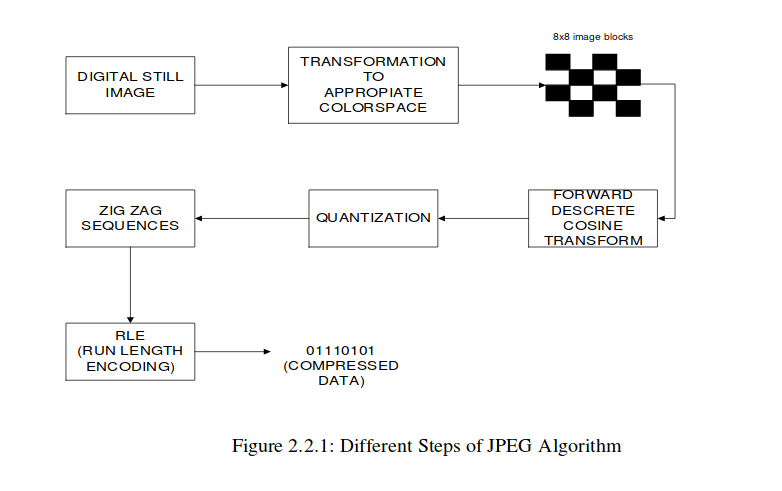

In [2]:
from IPython.display import Image
Image("Algo steps.png")

<h2> B- Importing Lib

In [3]:
import cv2
import numpy as np
import math
import sys
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pylab
from pylab import *
%matplotlib inline
def plot_side_by_side(image1, image2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)) 
    ax1.set_title("Original Image" )
    ax2.set_title("Compressed Image")
    ax1.axis("off")
    ax2.axis("off")
    plt.show()

<h2> C- Functions


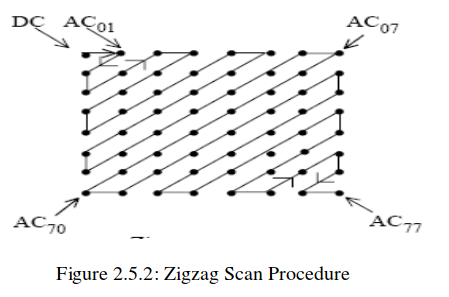

In [4]:
from IPython.display import Image
Image("Zigzag.png")

In [5]:
def zig_zag(input_matrix):
    block_size = 8
    z = np.empty([block_size*block_size])
    index = -1
    bound = 0
    for i in range(0, 2 * block_size -1):
        if i < block_size:
            bound = 0
        else:
            bound = i - block_size + 1
        for j in range(bound, i - bound + 1):
            index += 1
            if i % 2 == 1:
                z[index] = input_matrix[j, i-j]
            else:
                z[index] = input_matrix[i-j, j]
    return z


In [6]:
global sumtion 
sumtion =0
def DCT(block):
    m = 8
    n = 8 
    global sumtion
    output = np.zeros(shape=(n,m))
    for i in range(m):
        for j in range(n):
            if(i==0):
                ci = (1.0/ (math.sqrt(m)))
                #print (i,j,"ci",ci)
                
            else:
                ci = ((math.sqrt(2))/ (math.sqrt(m)))
                #print (i,j,"ci",ci)
            if(j==0):
                cj = (1.0/ (math.sqrt(n)))
                #print (i,j,"cj",cj)
            else:
                cj = float((math.sqrt(2))/ (math.sqrt(n)))
                #print (i,j,"cj",cj)
            sumtion = 0 
            for k in range(m):
                for l in range(n):
                    temp =  block[k][l]* math.cos(((2*k+1)*i*3.142857)/(2*m))*math.cos(((2*l+1)*j*3.142857)/(2*n))
                    sumtion += temp     
            #print (k,l,sumtion)
            output[i][j] = (ci * cj *sumtion)
            
    return output
#Input = np.array([[255,255,255,255,255,255,255,255], [255,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255]])
#print (Input)
#print (DCT(Input))    

<h2> D- Main

In [10]:
#intial values
block_size = 8
Q_Mat = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
#phase1:transform to appropreate colorspace
imag0 = cv2.imread('in.jpg')
img = cv2.imread('in.jpg', cv2.IMREAD_GRAYSCALE)
gray_image = cv2.cvtColor(imag0, cv2.COLOR_RGB2GRAY)
cv2.imwrite('IN.jpg',gray_image)
imAg = cv2.imread('IN.jpg')
#print(img)
[h,w] = img.shape

#calculate no of blocks needed
h = np.float32(h) 
w = np.float32(w) 

No_h = math.floor(h/block_size)
No_h = np.int32(No_h)
No_w = math.floor(w/block_size)
No_w = np.int32(No_w)
#print(No_h,No_w)

#new image mat
H =  block_size * No_h
W =  block_size * No_w
New_img = np.zeros((H,W))
#print(H,W)
# copy the values of img into New_img[0:h,0:w]
for i in range(h):
         for j in range(w):
                pixel = img[i,j]
                New_img[i,j] = pixel

#start compression process
for i in range(No_h):
        # Compute start and end row index of the block
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1 + block_size
        for j in range(No_w):
            # Compute start & end column index of the block
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size         
            block = img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ] 
            # apply 2D discrete cosine transform to the selected block                       
            DCT_2 = DCT(block)  
            DCT_normalized = np.divide(DCT_2,Q_Mat).astype(int)
            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            after_zigzag = zig_zag(DCT_normalized)
            # reshape the output of zigzag array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(DCT_normalized, (block_size, block_size)) 
            # copy reshaped matrix into padded_img on current block corresponding indices
            New_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped  
cv2.imwrite('Output.jpg', np.uint8(New_img))
output = cv2.imread("Output.jpg",1)


<h2> Output:

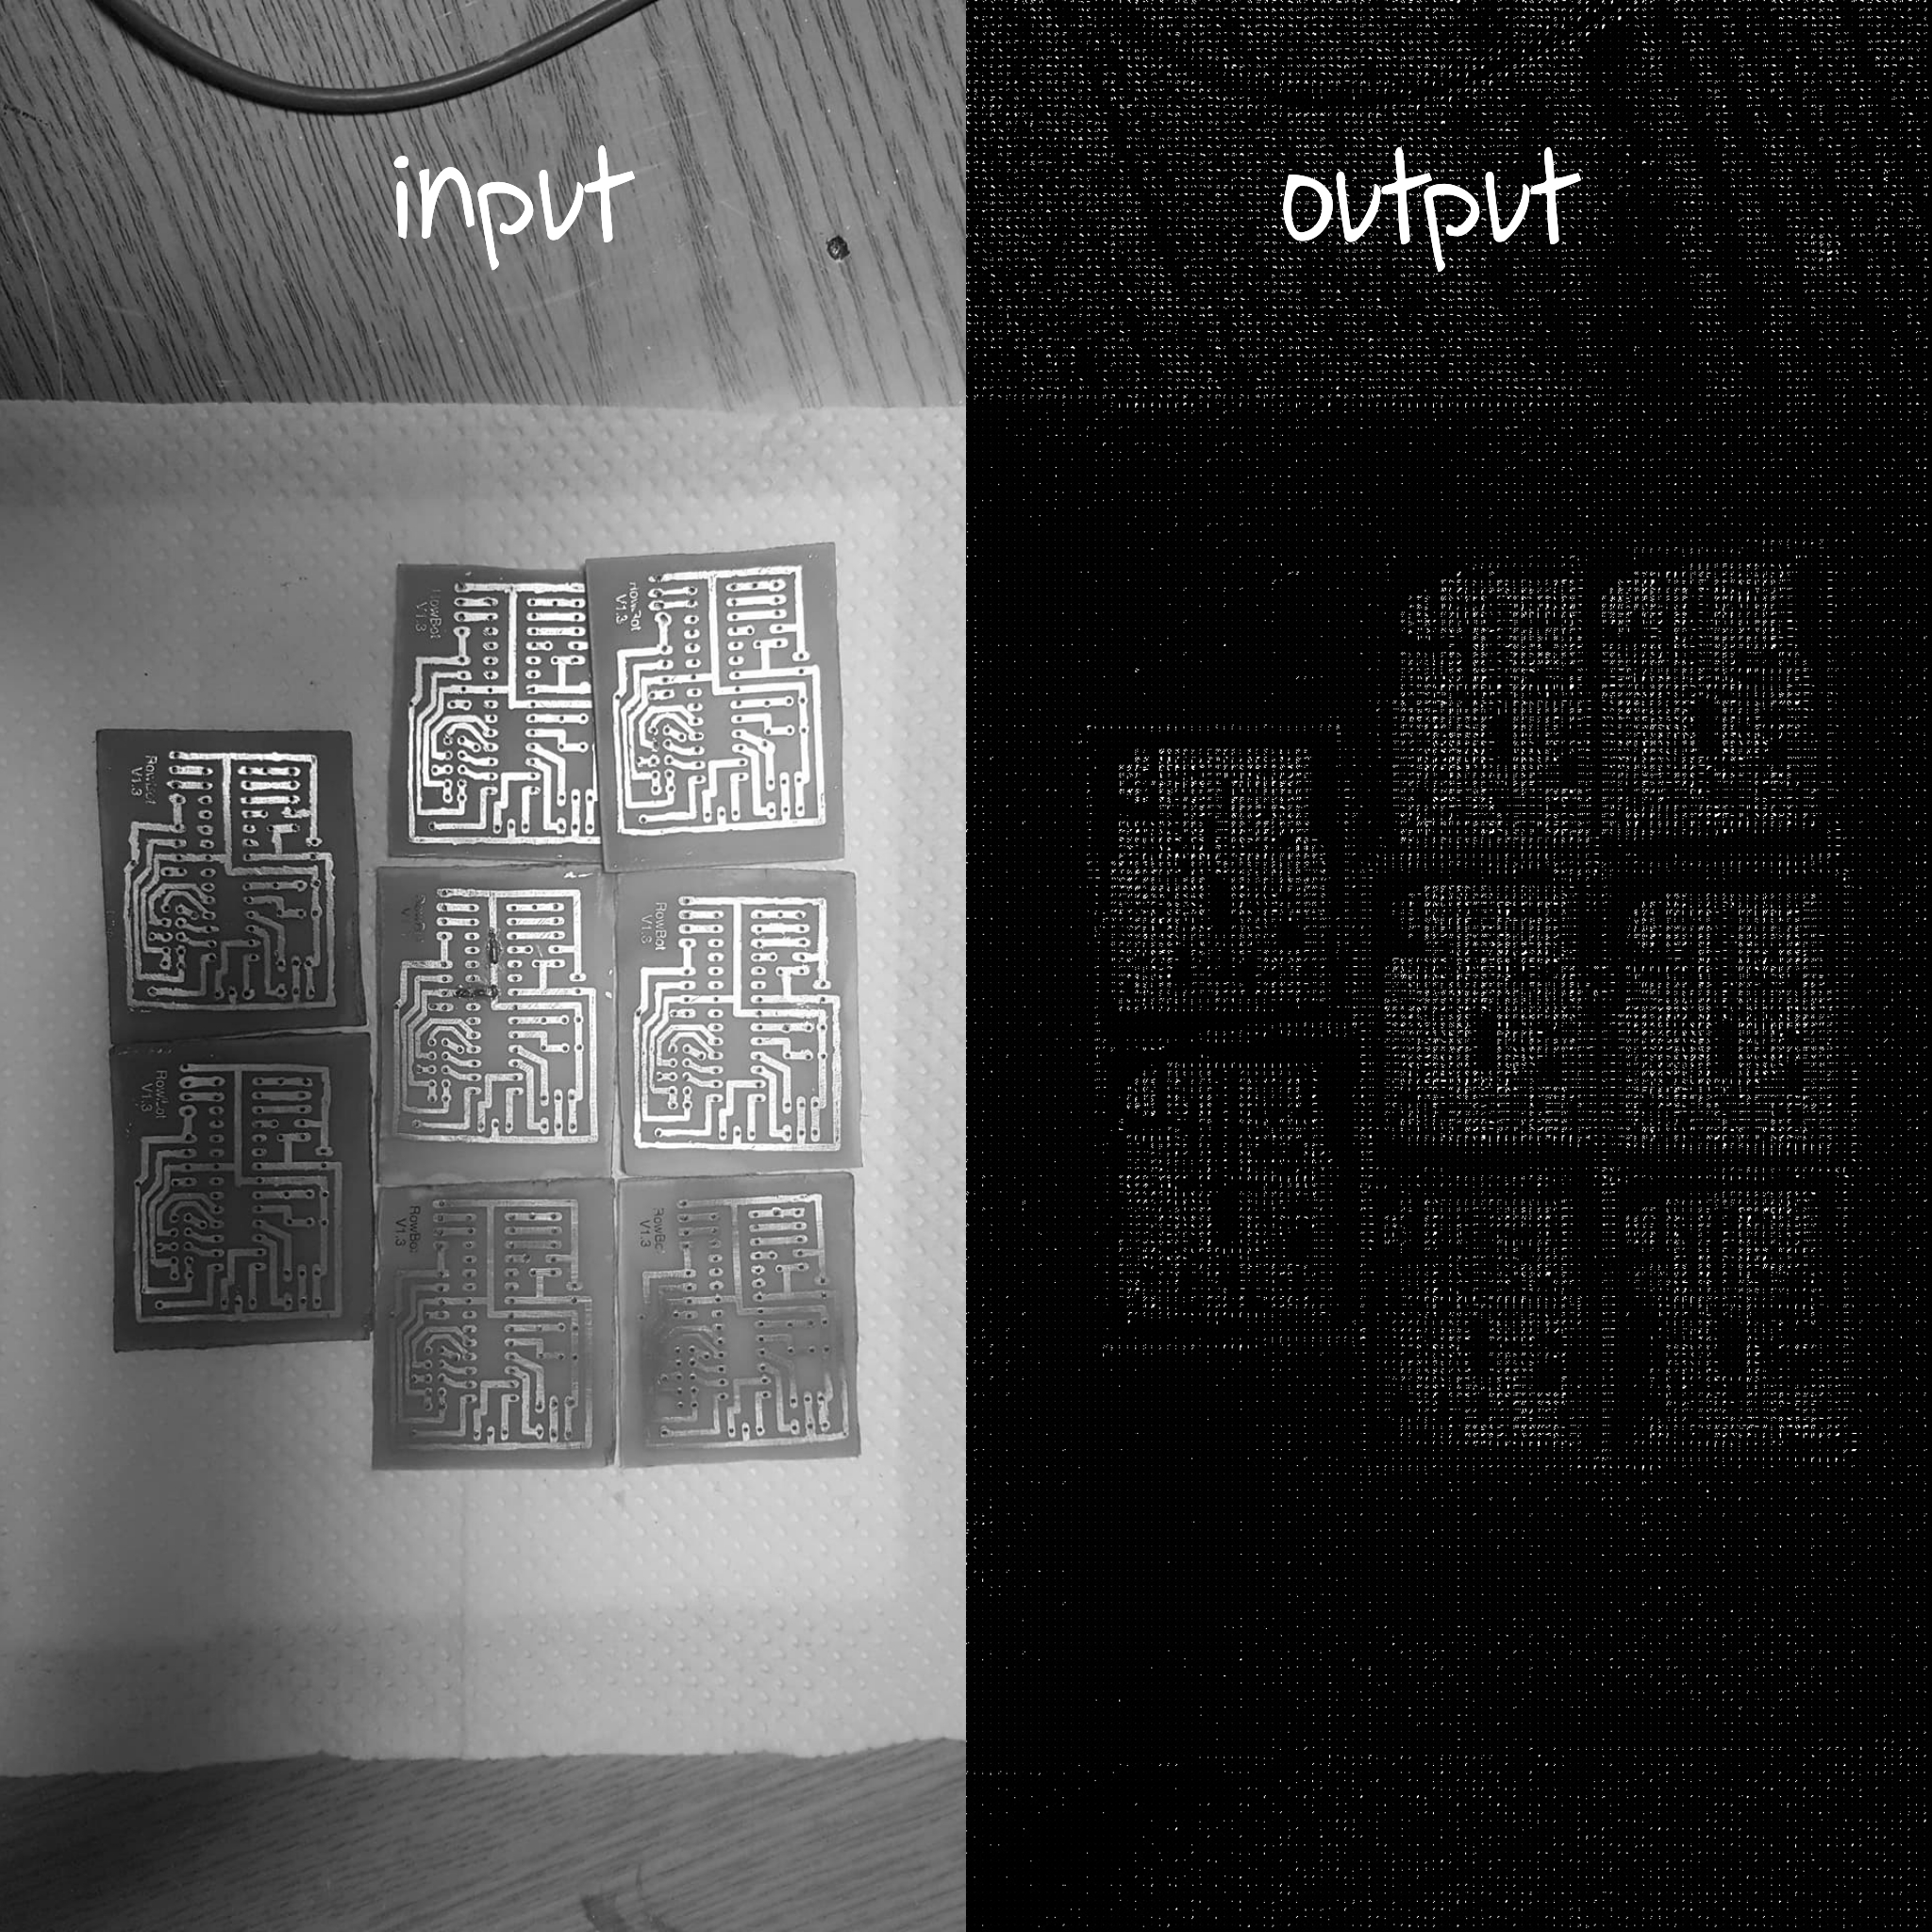

In [12]:
#the ploted imgby implot didn't read the img right
from IPython.display import Image
Image("Test_Comp.jpg")

<h1>2- Harris Corner Detection

<h2> A- Algo Steps

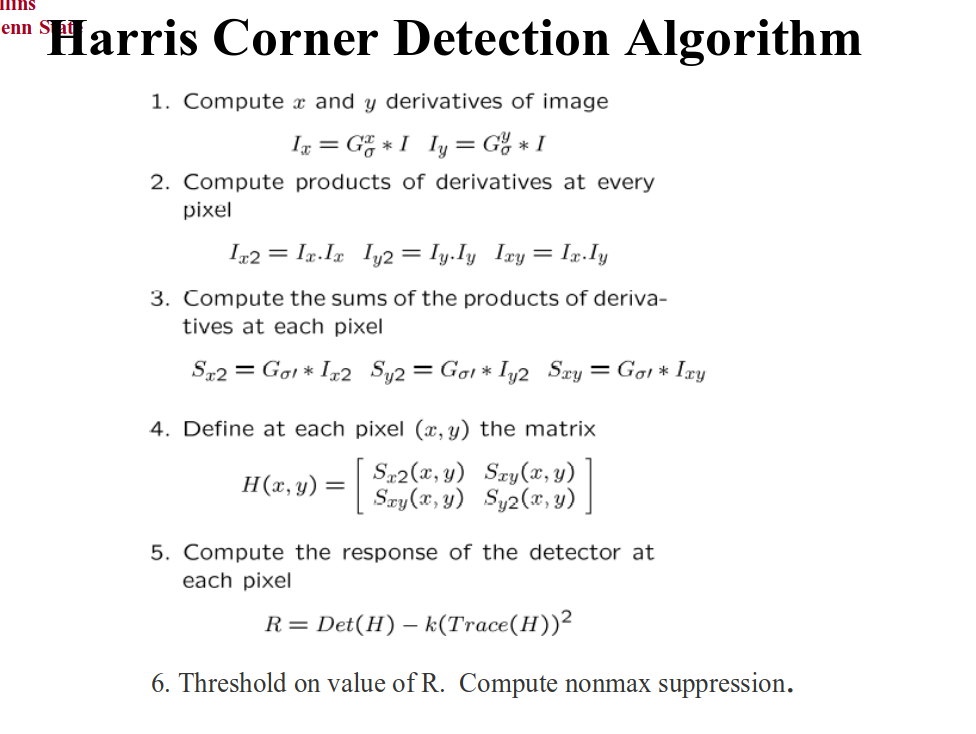

In [36]:
from IPython.display import Image
Image("Harris.png")

<h2> B- Function

In [19]:
def Harris(img,color_img, window_size, thresh, k):
   
    #Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]

    cornerList = []
    offset = int(window_size/2)

    #Loop through image and find our corners
    for y in range(offset, height-window_size):
        for x in range(offset, width-window_size):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)

            #If corner response is over threshold, color the point and add to corner list
            if r > thresh:
                #print x, y, r
                cornerList.append([x, y, r])
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255) 
    
    for (x, y, r) in cornerList:
        plt.plot(x, y, '.')
        
    plt.imshow(color_img)
    plt.show()       

<h2> Expected Output:

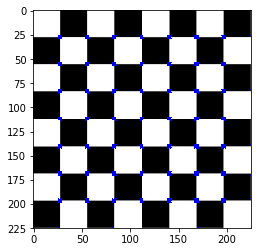

In [23]:
image = cv2.imread('index.png', 0)
coloredImage = cv2.imread('index.png', 1)
gray = cv2.cvtColor(coloredImage,cv2.COLOR_BGR2GRAY) 
dst = cv2.cornerHarris(gray,3,3,0.04)
coloredImage[dst>0.01*dst.max()] = [0,0,255]
plt.imshow(coloredImage)
plt.show()

<h2> Output:

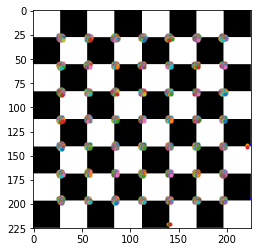

In [24]:
Harris(image,coloredImage,3, 3, 0.04)